In [1]:
import numpy as np
import random
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
import h5py

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
os.getcwd() # Thu muc hien tai
os.chdir("drive/My Drive/Colab Notebooks") # Truy cap thu muc drive
!ls

 Assigment_2_keras.ipynb  'Copy of Assigment_1_keras.ipynb'
 Cifar12.hdf5		  'Copy of submission.ipynb'


In [0]:
def plot_cifar13(class_name=None):
      mapping = {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4,
                'dog': 5, 'fog': 6, 'horse': 7, 'ship': 8, 'truck': 9, 'human':10, 'car': 11, 'licence':12}

      data = h5py.File('Cifar12.hdf5','r')  # Get features and labels
      train_data = np.array(data["X_train"])
      train_labels = np.array(data["Y_train"])

      if class_name == None:
        fig, ax = plt.subplots(13, 10, sharey=True, figsize=(11,10))
        for j in range(13):
          class_index = (train_labels == j)[:,0] #get all values in column 0 (from all rows)
          class_imgs =  train_data[class_index,:,:][np.random.choice(5000, 10),:,:]
          for i, img in enumerate(class_imgs):
            ax[j,i].imshow(img)
            ax[j,i].grid('off')
            ax[j,i].set_xticks([])
            ax[j,i].set_yticks([])
            if i == 0:
              ax[j,i].set_ylabel(list(mapping.keys())[j])
      else:
        class_index = (train_labels == mapping[class_name])[:,0]
        class_imgs = train_data[class_index,:,:][np.random.choice(5000, 10),:,:]
        fig, ax = plt.subplots(1, 10, sharey=True, figsize=(22,2))
        for i, img in enumerate(class_imgs):
          ax[i].imshow(img)
          ax[i].grid('off')
          ax[i].set_xticks([])
          ax[i].set_yticks([])
          if i == 0:
            ax[i].set_ylabel(class_name)

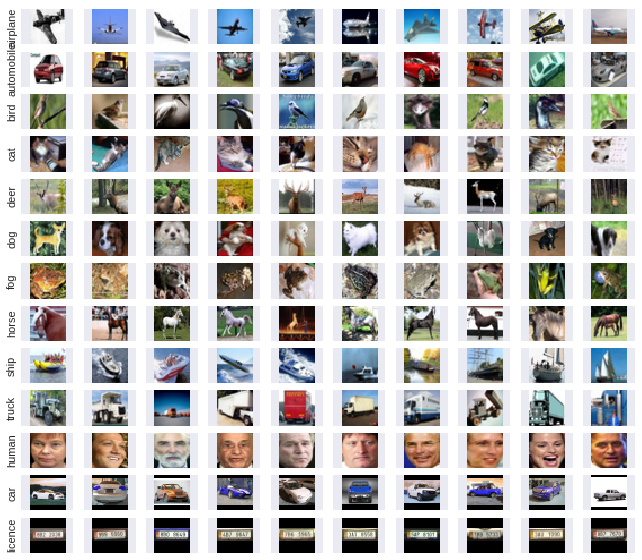

In [5]:
plot_cifar13()

In [0]:
def to_one_hot(X):
    one_hot = np.zeros((len(X), 13))
    for i in range(len(X)):
        np.put(one_hot[i, :], X[i], 1)
    return one_hot

In [6]:
dataset = h5py.File('Cifar12.hdf5','r')  # Get features and labels
print(list(dataset.keys()))

X_train = np.array(dataset["X_train"])
X_test = np.array(dataset["X_test"])
Y_train = to_one_hot(np.array(dataset["Y_train"]))
Y_test = to_one_hot(np.array(dataset["Y_test"]))

['X_test', 'X_train', 'Y_test', 'Y_train']


In [8]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(65000, 32, 32, 3)
(65000, 13)
(16000, 32, 32, 3)
(16000, 13)


In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras.datasets import cifar10
from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation, Dense, Flatten, Dropout
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [0]:
def MyNet(width, height, depth, classes):
    model = Sequential()
    input_shape = (height, width, depth)
    
    # First CONV => RELU => CONV => RELU => POOL layer set
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', input_shape = input_shape))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis = -1))
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis = -1))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    
    # Second CONV => RELU => CONV => RELU => POOL layer set
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis = -1))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis = -1))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    
    # First set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(units = 512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    # Softmax classifier
    model.add(Dense(units = classes))
    model.add(Activation('softmax'))
    
    return model

In [0]:
def visualize_loss(model,num_epochs):
    history_dict = H.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, num_epochs+1)
    
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
  


In [0]:
def visualize_acc(model,num_epochs):
    history_dict = H.history
    epochs = range(1, num_epochs+1)
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    
    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

In [14]:
optimizer = SGD(lr = 0.01, momentum = 0.9)
model = MyNet(32, 32, 3, 13)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
H = model.fit(X_train, Y_train, batch_size = 500, validation_data = (X_test, Y_test), verbose = 1, epochs = 80)

Train on 65000 samples, validate on 16000 samples
Epoch 1/80
65000/65000 [==============================] - 15s 236us/step - loss: 1.4611 - acc: 0.5101 - val_loss: 1.1788 - val_acc: 0.6008
Epoch 2/80
65000/65000 [==============================] - 14s 219us/step - loss: 1.0306 - acc: 0.6315 - val_loss: 0.8384 - val_acc: 0.7132
Epoch 3/80
65000/65000 [==============================] - 14s 219us/step - loss: 0.9092 - acc: 0.6778 - val_loss: 0.6598 - val_acc: 0.7699
Epoch 4/80
65000/65000 [==============================] - 14s 219us/step - loss: 0.8209 - acc: 0.7112 - val_loss: 0.6131 - val_acc: 0.7844
Epoch 5/80
65000/65000 [==============================] - 14s 219us/step - loss: 0.7530 - acc: 0.7334 - val_loss: 0.5589 - val_acc: 0.8046
Epoch 6/80
65000/65000 [==============================] - 14s 219us/step - loss: 0.7068 - acc: 0.7495 - val_loss: 0.5446 - val_acc: 0.8112
Epoch 7/80
65000/65000 [==============================] - 14s 219us/step - loss: 0.6651 - acc: 0.7674 - val_loss: 0.

In [15]:
# Evaluate the model
scores = model.evaluate(X_test , Y_test)

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

16000/16000 [==============================] - 2s 156us/step
Loss: 0.392
Accuracy: 0.893


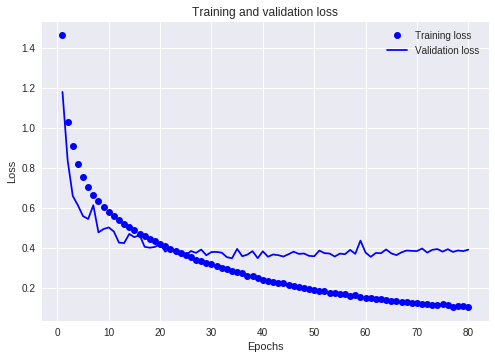

In [16]:
visualize_loss(H,80)

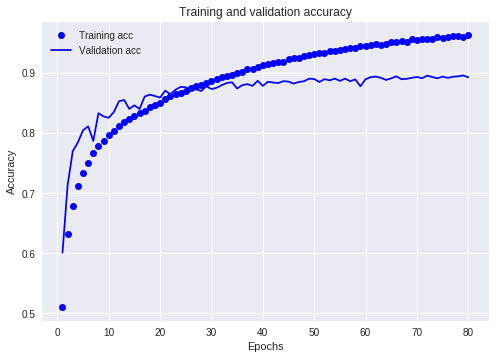

In [17]:
visualize_acc(H,80)

In [19]:
optimizer = Adagrad(lr=0.01, decay=1e-6)
model = MyNet(32, 32, 3, 13)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
H2 = model.fit(X_train, Y_train, 
              batch_size = 32,
              validation_data = (X_test, Y_test),
              verbose = 1,
              shuffle=True,
              epochs = 80)

Train on 65000 samples, validate on 16000 samples
Epoch 1/80
65000/65000 [==============================] - 51s 787us/step - loss: 1.0498 - acc: 0.6384 - val_loss: 0.6907 - val_acc: 0.7525
Epoch 2/80
65000/65000 [==============================] - 47s 724us/step - loss: 0.7714 - acc: 0.7300 - val_loss: 0.5749 - val_acc: 0.7986
Epoch 3/80
65000/65000 [==============================] - 48s 741us/step - loss: 0.6882 - acc: 0.7602 - val_loss: 0.5253 - val_acc: 0.8164
Epoch 4/80
65000/65000 [==============================] - 46s 711us/step - loss: 0.6320 - acc: 0.7815 - val_loss: 0.5044 - val_acc: 0.8249
Epoch 5/80
65000/65000 [==============================] - 46s 707us/step - loss: 0.5929 - acc: 0.7942 - val_loss: 0.4739 - val_acc: 0.8382
Epoch 6/80
65000/65000 [==============================] - 45s 700us/step - loss: 0.5595 - acc: 0.8050 - val_loss: 0.4593 - val_acc: 0.8389
Epoch 7/80
65000/65000 [==============================] - 45s 699us/step - loss: 0.5339 - acc: 0.8142 - val_loss: 0.

In [20]:
# Evaluate the model
scores = model.evaluate(X_test, Y_test)
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

16000/16000 [==============================] - 3s 167us/step
Loss: 0.360
Accuracy: 0.890


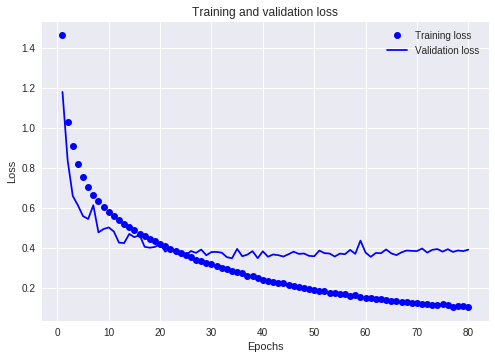

In [21]:
visualize_loss(H2,80)

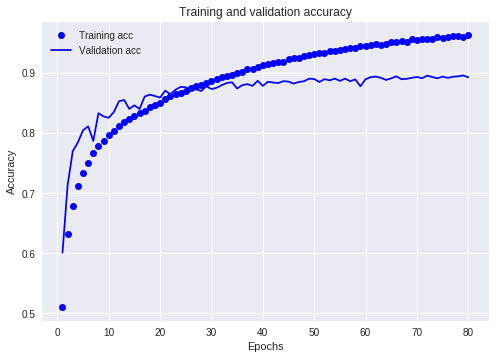

In [22]:
visualize_acc(H2,80)

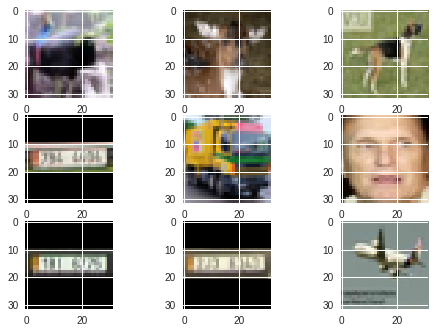

In [14]:
from matplotlib import pyplot
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i])
# show the plot
pyplot.show()

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

datagen.fit(X_train)


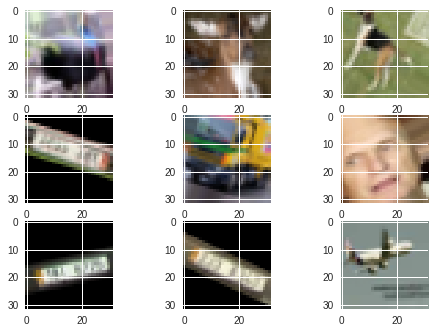

In [16]:

for X_batch, y_batch in datagen.flow(X_train, Y_train, batch_size=9, shuffle=False):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i])
	# show the plot
	pyplot.show()
	break

In [17]:
optimizer = Adagrad(lr=0.01, decay=1e-6)
model = MyNet(32, 32, 3, 13)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
H3 = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=500),
                    steps_per_epoch=len(X_train) / 500, validation_data = (X_test, Y_test),
                    verbose = 1,
                    shuffle=True,
                    epochs = 80)

Epoch 1/80
130/130 [==============================] - 41s 313ms/step - loss: 1.4438 - acc: 0.5273 - val_loss: 0.8884 - val_acc: 0.6804
Epoch 2/80
130/130 [==============================] - 38s 289ms/step - loss: 1.0605 - acc: 0.6252 - val_loss: 0.8575 - val_acc: 0.7086
Epoch 3/80
130/130 [==============================] - 37s 286ms/step - loss: 0.9741 - acc: 0.6570 - val_loss: 0.7527 - val_acc: 0.7358
Epoch 4/80
130/130 [==============================] - 38s 290ms/step - loss: 0.9140 - acc: 0.6772 - val_loss: 0.7726 - val_acc: 0.7398
Epoch 5/80
130/130 [==============================] - 38s 291ms/step - loss: 0.8761 - acc: 0.6912 - val_loss: 0.7103 - val_acc: 0.7569
Epoch 6/80
130/130 [==============================] - 38s 290ms/step - loss: 0.8424 - acc: 0.7046 - val_loss: 0.6925 - val_acc: 0.7586
Epoch 7/80
130/130 [==============================] - 37s 288ms/step - loss: 0.8178 - acc: 0.7139 - val_loss: 0.6310 - val_acc: 0.7822
Epoch 8/80
130/130 [==============================] - 3

In [18]:
# Evaluate the model
scores = model.evaluate(X_test , Y_test)
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

16000/16000 [==============================] - 3s 158us/step
Loss: 0.420
Accuracy: 0.860
